In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

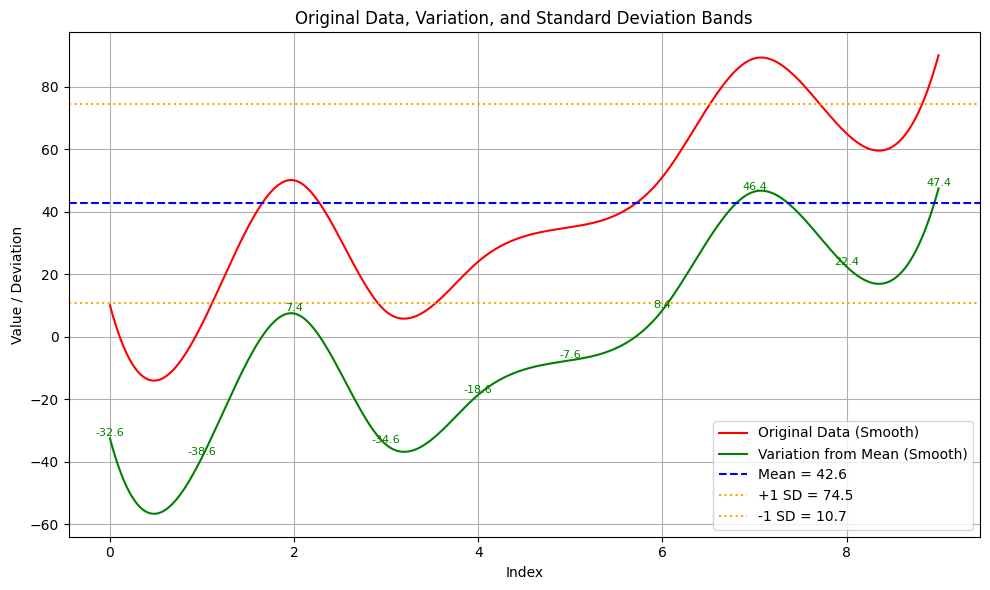

Mean: 42.6
Standard Deviation: 31.938134642531086


In [2]:
# Original data
data = np.array([10, 4, 50, 8, 24, 35, 51, 89, 65, 90])
df = pd.DataFrame(data)
data = df[0]

# Mean and standard deviation
mean = data.mean()
std = data.std()
variation = data - mean

# X values and smooth X
x = np.arange(len(data))
x_smooth = np.linspace(x.min(), x.max(), 300)

# Smooth lines for original data and variation
spl_data = make_interp_spline(x, data, k=3)
spl_var = make_interp_spline(x, variation, k=3)
data_smooth = spl_data(x_smooth)
var_smooth = spl_var(x_smooth)

# Plotting
plt.figure(figsize=(10, 6))

# Smoothed original data (red)
plt.plot(x_smooth, data_smooth, 'r-', label='Original Data (Smooth)')

# Smoothed variation (green)
plt.plot(x_smooth, var_smooth, 'g-', label='Variation from Mean (Smooth)')

# Mean line (blue dashed)
plt.axhline(y=mean, color='blue', linestyle='--', label=f'Mean = {mean:.1f}')

# Standard deviation lines (orange)
plt.axhline(y=mean + std, color='orange', linestyle=':', label=f'+1 SD = {mean + std:.1f}')
plt.axhline(y=mean - std, color='orange', linestyle=':', label=f'-1 SD = {mean - std:.1f}')

# Annotate each variation point
for i in range(len(data)):
    plt.text(i, variation[i], f'{variation[i]:.1f}', ha='center', va='bottom', fontsize=8, color='green')

# Titles and labels
plt.title("Original Data, Variation, and Standard Deviation Bands")
plt.xlabel("Index")
plt.ylabel("Value / Deviation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional print
print("Mean:", mean)
print("Standard Deviation:", std)